In [35]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 
import math


import glob
import re
import os

In [36]:
csvs = glob.glob('./match_data_yearly/*.csv')
df = pd.DataFrame()
for csv in csvs:
    df = df.append(pd.read_csv(csv))

In [37]:
df = df.reset_index(drop=True)
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,HomeED,AwayED
0,2018,1,2018-02-23 00:00:00,sagan-tosu,vissel-kobe,33,18,1,1,0,ベアスタ,19633,1393.0,1402.0,-1.0,2.0
1,2018,1,2018-02-24 00:00:00,fc-tokyo,urawa-red-diamonds,22,3,1,1,0,味スタ,35951,1419.0,1551.0,1.0,0.0
2,2018,1,2018-02-24 00:00:00,sanfrecce-hiroshima,consadole-sapporo,10,14,1,0,1,Ｅスタ,17026,1451.0,1277.0,2.0,-1.0
3,2018,1,2018-02-24 00:00:00,gamba-osaka,nagoya-grampus-eight,9,8,2,3,2,吹田Ｓ,28681,1422.0,1358.0,-8.0,7.0
4,2018,1,2018-02-24 00:00:00,shonan-bellmare,v-varen-nagasaki,12,47,2,1,1,ＢＭＷス,12148,1266.0,1296.0,4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2011,34,2011-12-03 00:00:00,montedio-yamagata,sanfrecce-hiroshima,29,10,1,3,2,ＮＤスタ,7016,1247.0,1415.0,-7.0,7.0
3362,2011,34,2011-12-03 00:00:00,jubilo-iwata,kawasaki-frontale,13,21,2,1,1,ヤマハ,12349,1356.0,1394.0,4.0,-5.0
3363,2011,34,2011-12-03 00:00:00,cerezo-osaka,avispa-fukuoka,20,23,7,1,1,金鳥スタ,11009,1478.0,1252.0,3.0,-3.0
3364,2011,34,2011-12-03 00:00:00,urawa-red-diamonds,kashiwa-reysol,3,11,1,3,2,埼玉,54441,1340.0,1444.0,-8.0,6.0


In [38]:
df.insert(14, 'EloDiff',np.nan)
for index,row in df.iterrows():
    diff=row["HomeElo"]-row["AwayElo"]
    df.at[index,"EloDiff"] = diff
    
    

In [39]:
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,EloDiff,HomeED,AwayED
0,2018,1,2018-02-23 00:00:00,sagan-tosu,vissel-kobe,33,18,1,1,0,ベアスタ,19633,1393.0,1402.0,-9.0,-1.0,2.0
1,2018,1,2018-02-24 00:00:00,fc-tokyo,urawa-red-diamonds,22,3,1,1,0,味スタ,35951,1419.0,1551.0,-132.0,1.0,0.0
2,2018,1,2018-02-24 00:00:00,sanfrecce-hiroshima,consadole-sapporo,10,14,1,0,1,Ｅスタ,17026,1451.0,1277.0,174.0,2.0,-1.0
3,2018,1,2018-02-24 00:00:00,gamba-osaka,nagoya-grampus-eight,9,8,2,3,2,吹田Ｓ,28681,1422.0,1358.0,64.0,-8.0,7.0
4,2018,1,2018-02-24 00:00:00,shonan-bellmare,v-varen-nagasaki,12,47,2,1,1,ＢＭＷス,12148,1266.0,1296.0,-30.0,4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2011,34,2011-12-03 00:00:00,montedio-yamagata,sanfrecce-hiroshima,29,10,1,3,2,ＮＤスタ,7016,1247.0,1415.0,-168.0,-7.0,7.0
3362,2011,34,2011-12-03 00:00:00,jubilo-iwata,kawasaki-frontale,13,21,2,1,1,ヤマハ,12349,1356.0,1394.0,-38.0,4.0,-5.0
3363,2011,34,2011-12-03 00:00:00,cerezo-osaka,avispa-fukuoka,20,23,7,1,1,金鳥スタ,11009,1478.0,1252.0,226.0,3.0,-3.0
3364,2011,34,2011-12-03 00:00:00,urawa-red-diamonds,kashiwa-reysol,3,11,1,3,2,埼玉,54441,1340.0,1444.0,-104.0,-8.0,6.0


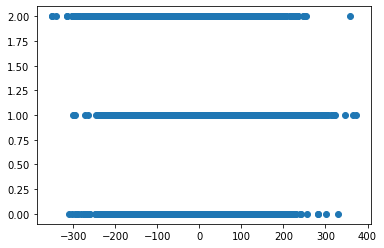

In [40]:
plt.scatter(df["EloDiff"],df["W/L"])

(array([ 27., 135., 320., 575., 710., 770., 477., 263.,  74.,  15.]),
 array([-351. , -278.6, -206.2, -133.8,  -61.4,   11. ,   83.4,  155.8,
         228.2,  300.6,  373. ]),
 <BarContainer object of 10 artists>)

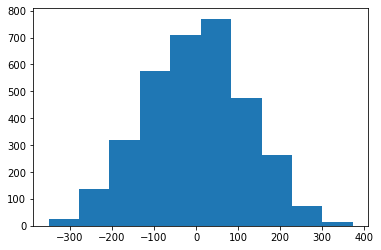

In [41]:
plt.hist(df["EloDiff"])

In [43]:
df

,Year,Sec,Date,Home,Away,HomeID,AwayID,HomeGF,AwayGF,W/L,Stadium,Attendances,HomeElo,AwayElo,EloDiff,HomeED,AwayED
0,2018,1,2018-02-23 00:00:00,sagan-tosu,vissel-kobe,33,18,1,1,0,ベアスタ,19633,1393.0,1402.0,-9.0,-1.0,2.0
1,2018,1,2018-02-24 00:00:00,fc-tokyo,urawa-red-diamonds,22,3,1,1,0,味スタ,35951,1419.0,1551.0,-132.0,1.0,0.0
2,2018,1,2018-02-24 00:00:00,sanfrecce-hiroshima,consadole-sapporo,10,14,1,0,1,Ｅスタ,17026,1451.0,1277.0,174.0,2.0,-1.0
3,2018,1,2018-02-24 00:00:00,gamba-osaka,nagoya-grampus-eight,9,8,2,3,2,吹田Ｓ,28681,1422.0,1358.0,64.0,-8.0,7.0
4,2018,1,2018-02-24 00:00:00,shonan-bellmare,v-varen-nagasaki,12,47,2,1,1,ＢＭＷス,12148,1266.0,1296.0,-30.0,4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,2011,34,2011-12-03 00:00:00,montedio-yamagata,sanfrecce-hiroshima,29,10,1,3,2,ＮＤスタ,7016,1247.0,1415.0,-168.0,-7.0,7.0
3362,2011,34,2011-12-03 00:00:00,jubilo-iwata,kawasaki-frontale,13,21,2,1,1,ヤマハ,12349,1356.0,1394.0,-38.0,4.0,-5.0
3363,2011,34,2011-12-03 00:00:00,cerezo-osaka,avispa-fukuoka,20,23,7,1,1,金鳥スタ,11009,1478.0,1252.0,226.0,3.0,-3.0
3364,2011,34,2011-12-03 00:00:00,urawa-red-diamonds,kashiwa-reysol,3,11,1,3,2,埼玉,54441,1340.0,1444.0,-104.0,-8.0,6.0


In [140]:
df_wl=df[["EloDiff","W/L"]]
df_wl["EloDiff"]=df_wl["EloDiff"].round(-1)

<ipython-input-140-768adb1ee418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wl["EloDiff"]=df_wl["EloDiff"].round(-1)


In [141]:
df_d=df_wl[df_wl["W/L"]==0]["EloDiff"]
df_w=df_wl[df_wl["W/L"]==1]["EloDiff"]
df_l=df_wl[df_wl["W/L"]==2]["EloDiff"]

(array([[  3.,   2.,  12.,  14.,  26.,  30.,  36.,  48.,  89.,  62.,  72.,
          86.,  98.,  75.,  77.,  65., 115.,  63.,  51.,  33.,  54.,  12.,
          18.,   9.,  10.,   7.,   5.,   0.,   0.,   0.,   0.,   1.],
        [  3.,   3.,  16.,  19.,  36.,  37.,  50.,  61., 123.,  92., 101.,
         136., 173., 118., 123., 122., 186., 108.,  98.,  76., 115.,  46.,
          48.,  23.,  35.,  15.,   7.,   1.,   3.,   0.,   1.,   1.],
        [  3.,   3.,  19.,  20.,  41.,  47.,  67.,  71., 150., 114., 136.,
         186., 263., 195., 202., 209., 317., 202., 196., 176., 234., 113.,
          95.,  82., 100.,  47.,  27.,  18.,  23.,   5.,   1.,   4.]]),
 array([-350. , -327.5, -305. , -282.5, -260. , -237.5, -215. , -192.5,
        -170. , -147.5, -125. , -102.5,  -80. ,  -57.5,  -35. ,  -12.5,
          10. ,   32.5,   55. ,   77.5,  100. ,  122.5,  145. ,  167.5,
         190. ,  212.5,  235. ,  257.5,  280. ,  302.5,  325. ,  347.5,
         370. ]),
 <a list of 3 BarContainer objec

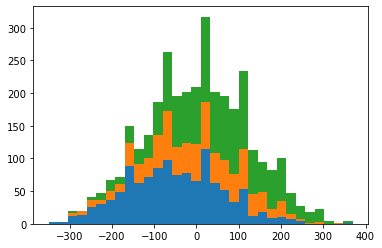

In [142]:
plt.hist((df_l,df_d,df_w),bins=32,stacked=True)

In [143]:
df_wl

,EloDiff,W/L
0,-10.0,0
1,-130.0,0
2,170.0,1
3,60.0,2
4,-30.0,1
...,...,...
3361,-170.0,2
3362,-40.0,1
3363,230.0,1
3364,-100.0,2


In [144]:
import seaborn as sns

In [145]:
df_wl

,EloDiff,W/L
0,-10.0,0
1,-130.0,0
2,170.0,1
3,60.0,2
4,-30.0,1
...,...,...
3361,-170.0,2
3362,-40.0,1
3363,230.0,1
3364,-100.0,2


In [166]:
df_wl_=pd.crosstab(df_wl["EloDiff"], df_wl["W/L"],normalize='index')
df_wl_

W/L,0,1,2
EloDiff,,,
-350.0,0.0,0.0,1.0
-340.0,0.0,0.0,1.0
-320.0,0.0,0.0,1.0
-310.0,1.0,0.0,0.0
-300.0,0.2,0.3,0.5
...,...,...,...
320.0,0.0,1.0,0.0
330.0,1.0,0.0,0.0
350.0,0.0,1.0,0.0


In [172]:
df_wl_=df_wl_[[2, 0, 1]]

<AxesSubplot:xlabel='EloDiff'>

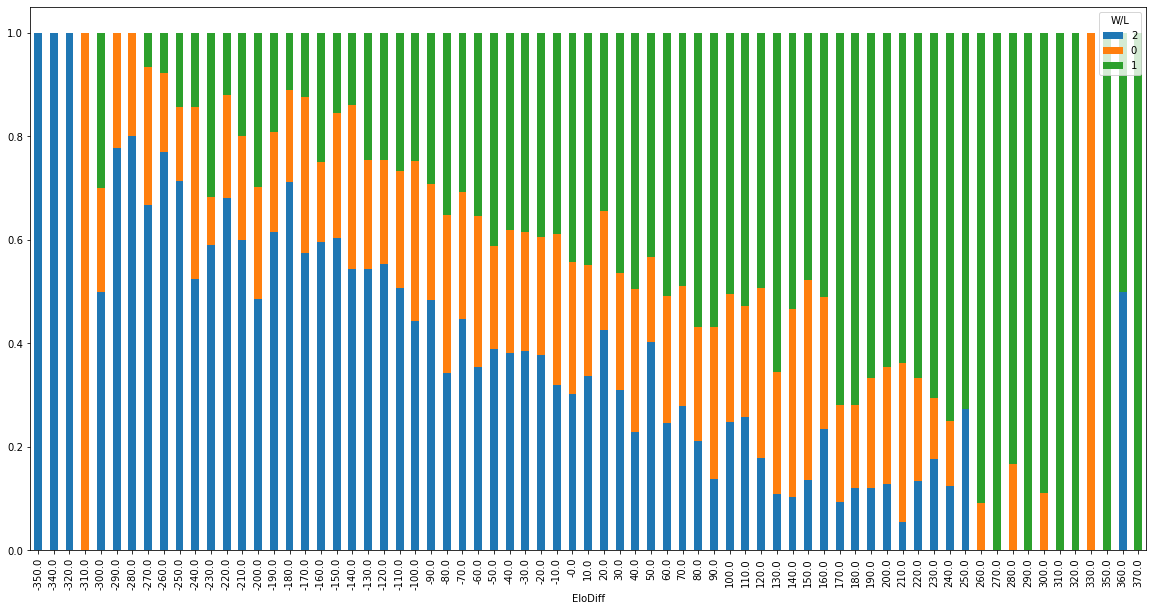

In [173]:
df_wl_.plot.bar(stacked=True,figsize=(20.0, 10.0))